In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
file_path = "/Users/shreeroopnilakhe/Downloads/water_potability.csv"
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Separate features (X) and target (y)
X = data.drop(columns='Potability')
y = data['Potability']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features to make them comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 2: Train-test split
# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Define the base models for stacking
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Define the final meta-learner model (Logistic Regression)
meta_learner = LogisticRegression()

# Step 4: Create and train the stacked model
# Combine base models using stacking with Logistic Regression as the final estimator
stacked_model = StackingClassifier(
    estimators=[('rf', random_forest), ('gb', gradient_boosting)],
    final_estimator=meta_learner
)

# Train the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Step 5: Model evaluation
# Predict on the test data
y_pred = stacked_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy result in a user-friendly way
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 68.67%


In [10]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.3/124.9 MB 4.2 MB/s eta 0:00:30
   ---------------------------------------- 0.7/124.9 MB 5.9 MB/s eta 0:00:22
   ---------------------------------------- 1.0/124.9 MB 6.6 MB/s eta 0:00:19
   ---------------------------------------- 1.4/124.9 MB 7.0 MB/s eta 0:00:18
    --------------------------------------- 1.8/124.9 MB 7.0 MB/s eta 0:00:18
    --------------------------------------- 2.2/124.9 MB 7.3 MB/s eta 0:00:17
    --------------------------------------- 2.5/124.9 MB 7.5 MB/s eta 0:00:17
    --------------------------------------- 2.8/124.9 MB 7.4 MB/s eta 0:00:17
    --------------------------------------- 3.1/124.9 MB 7.6 MB/s eta 0:00:16
   - -------------------------------------- 3.6/124.9 MB 7.8 MB/s eta 0:00:16
   - -------------------------------------- 4.0/124.9 MB 7.9 MB/s eta

In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Step 1: Fit the SVM model
# Assuming you have your training data as X_train and y_train
svm_model = svm.SVC()  # Initialize the SVM model
svm_model.fit(X_train, y_train)  # Fit the model to the training data

# Step 2: Make predictions using the fitted SVM model
y_pred_svm = svm_model.predict(X_test)

# Step 3: Calculate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print(f"Accuracy of SVM model: {accuracy_svm * 100:.2f}%")



Accuracy of SVM model: 69.28%


In [23]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Step 1: Fit the XGBoost model
# Assuming you have your training data as X_train and y_train
xgboost_model = xgb.XGBClassifier()  # Initialize the XGBoost model
xgboost_model.fit(X_train, y_train)  # Fit the model to the training data

# Step 2: Make predictions using the fitted XGBoost model
y_pred_xgboost = xgboost_model.predict(X_test)

# Step 3: Calculate the accuracy of the XGBoost model
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)

# Print the accuracy
print(f"Accuracy of XGBoost model: {accuracy_xgboost * 100:.2f}%")


Accuracy of XGBoost model: 66.02%


In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from scipy import stats

# Load the dataset
file_path = "/Users/shreeroopnilakhe/Downloads/water_potability.csv"
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Separate features (X) and target (y)
X = data.drop(columns='Potability')
y = data['Potability']

# Step 2: Outlier Removal (Z-score method)
# Remove rows where any feature's Z-score > 3 (considered an extreme outlier)
z_scores = stats.zscore(X, nan_policy='omit')
X = X[(abs(z_scores) < 3).all(axis=1)]
y = y[X.index]  # Match target values to remaining rows

# Step 3: Handle Missing Values with KNN Imputation
# Use K-Nearest Neighbors (KNN) Imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Step 4: Generate Polynomial Features
# Create polynomial and interaction features (degree 2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_imputed)

# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Step 6: Handle Class Imbalance using SMOTE
# SMOTE to balance the dataset if the target classes are imbalanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 7: Feature Selection based on Random Forest Importance
# Use RandomForest to select important features
feature_selector = SelectFromModel(RandomForestClassifier(random_state=42), threshold='mean')
X_selected = feature_selector.fit_transform(X_resampled, y_resampled)

# Step 8: Train-test split
# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=42)

# Step 9: Define the new base models for stacking
# Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the meta-learner model (Logistic Regression)
meta_learner = LogisticRegression()

# Step 10: Create and train the stacked model
# Combine base models using stacking with Logistic Regression as the final estimator
stacked_model = StackingClassifier(
    estimators=[('svm', svm_model), ('xgb', xgb_model)],
    final_estimator=meta_learner
)

# Train the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Step 11: Model evaluation
# Predict on the test data
y_pred = stacked_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy result
print(f"Model Accuracy after Advanced Preprocessing: {accuracy * 100:.2f}%")


Model Accuracy after Advanced Preprocessing: 73.50%


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from scipy import stats


file_path = "/Users/shreeroopnilakhe/Downloads/water_potability.csv"
data = pd.read_csv(file_path)

X = data.drop(columns='Potability')
y = data['Potability']

# Step 2: Outlier Removal (Z-score method)
z_scores = stats.zscore(X, nan_policy='omit')
X_cleaned = X[(abs(z_scores) < 3).all(axis=1)]
y_cleaned = y[X_cleaned.index]  # Match target values to remaining rows

# Step 3: Handle Missing Values with KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_cleaned)

# Step 4: Generate Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_imputed)

# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Step 6: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_cleaned)

# Step 7: Feature Selection based on Random Forest Importance
feature_selector = SelectFromModel(RandomForestClassifier(random_state=42), threshold='mean')
X_selected = feature_selector.fit_transform(X_resampled, y_resampled)

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=42)

# Step 9: Define the new base models for stacking
svm_model = SVC(probability=True, random_state=42)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the meta-learner model (Logistic Regression)
meta_learner = LogisticRegression()

# Step 10: Create and train the stacked model
# Combine base models using stacking with Logistic Regression as the final estimator
stacked_model = StackingClassifier(
    estimators=[('svm', svm_model), ('xgb', xgb_model)],
    final_estimator=meta_learner
)

# Train the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Step 11: Model evaluation
y_pred = stacked_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)


In [7]:
# Print the accuracy result
print(f"Model Accuracy after Advanced Preprocessing: {accuracy * 100:.2f}%")

Model Accuracy after Advanced Preprocessing: 73.50%


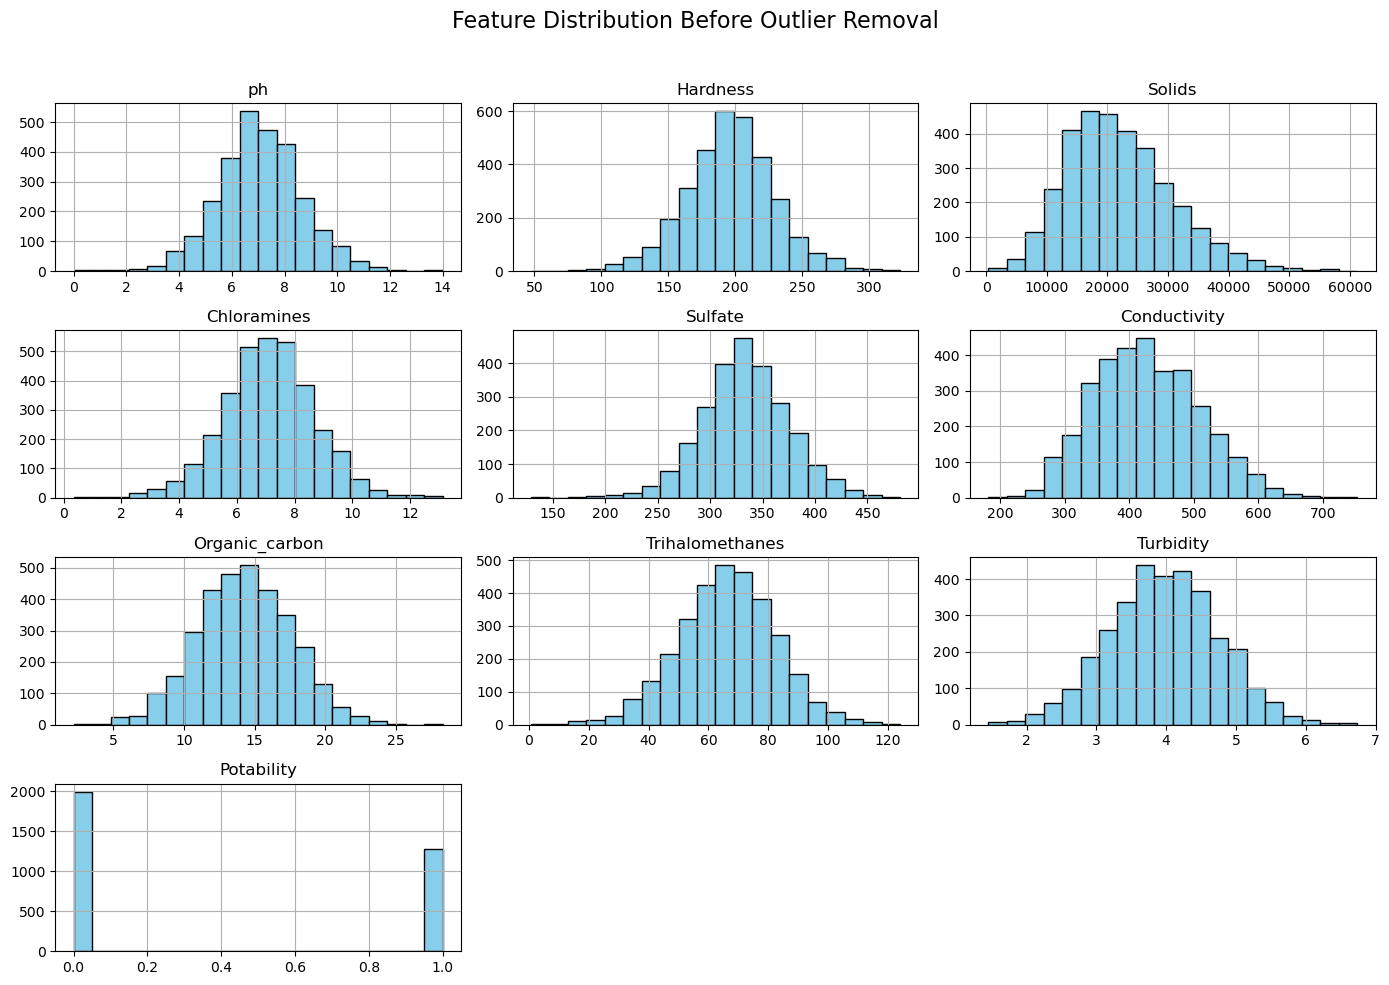

In [8]:
# Visualization 1: Feature Distribution Before and After Outlier Removal
data.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distribution Before Outlier Removal', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

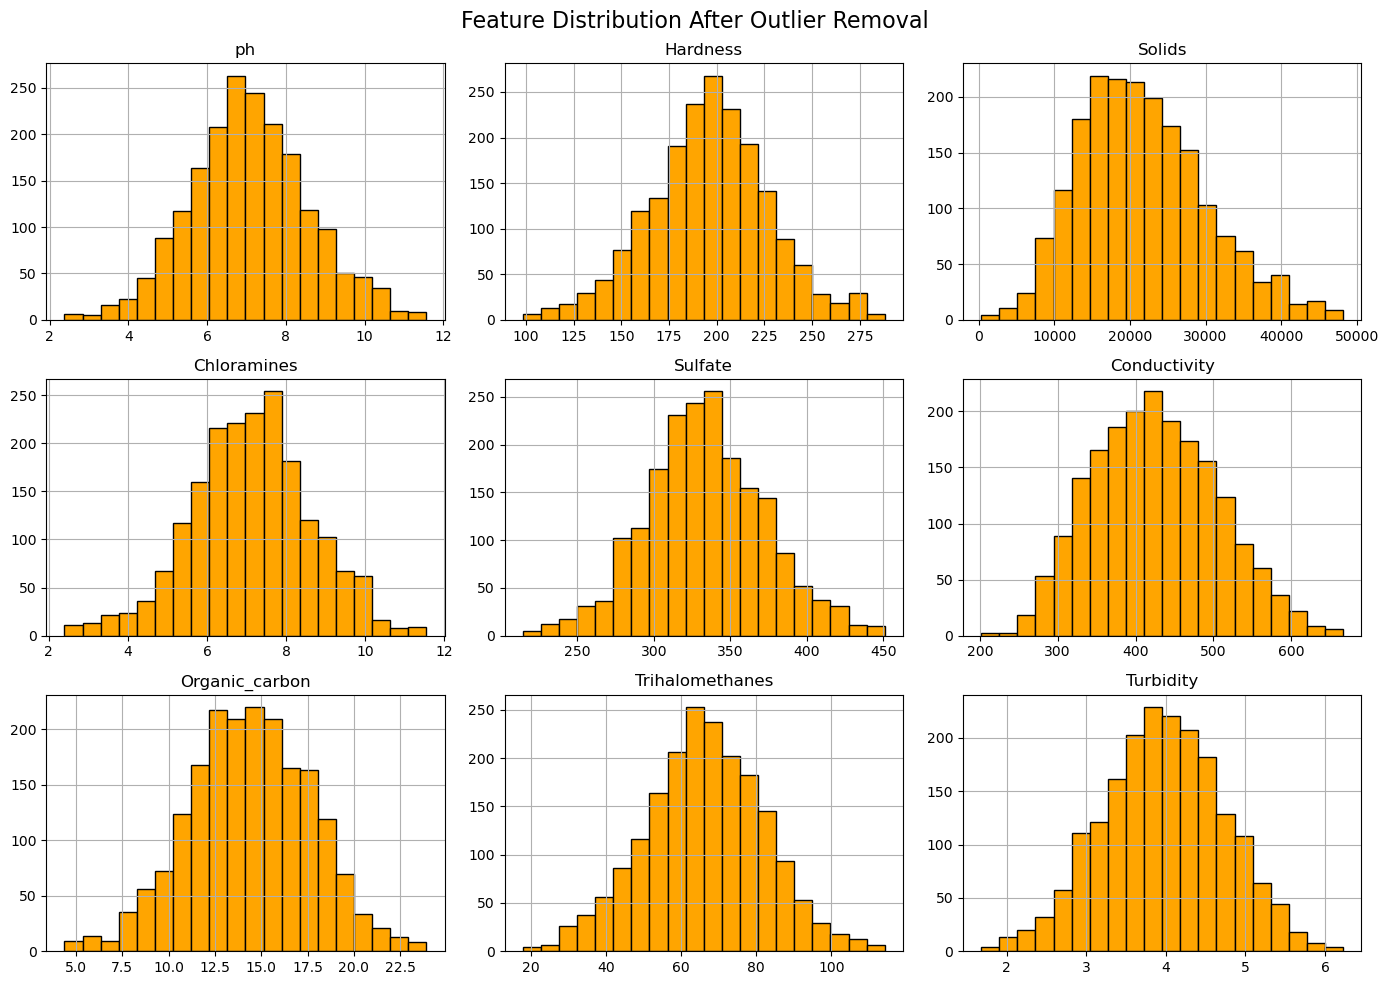

In [12]:
# Distribution after removing outliers (using the imputed data)
X_cleaned_df = pd.DataFrame(X_imputed, columns=data.columns[:-1])
X_cleaned_df.hist(bins=20, figsize=(14, 10), color='orange', edgecolor='black')
plt.suptitle('Feature Distribution After Outlier Removal', fontsize=16)
plt.tight_layout()
plt.show()

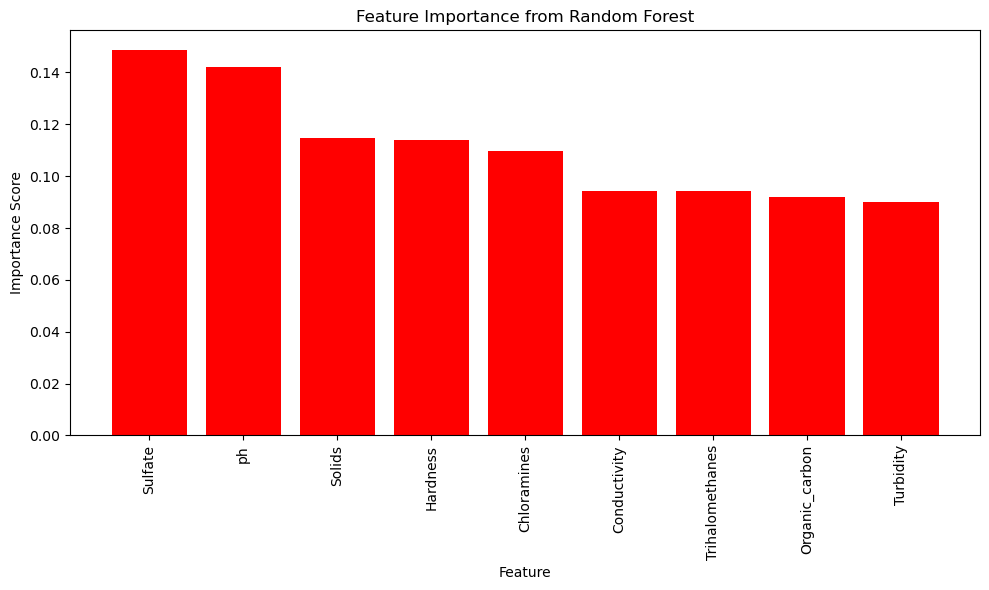

In [13]:
# Visualization 2: Feature Importance from Random Forest
# Define and train the RandomForestClassifier for feature selection
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_imputed, y_cleaned)

# Extract feature importances
importances = rf_selector.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Random Forest")
plt.bar(range(X_cleaned_df.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_cleaned_df.shape[1]), X_cleaned_df.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


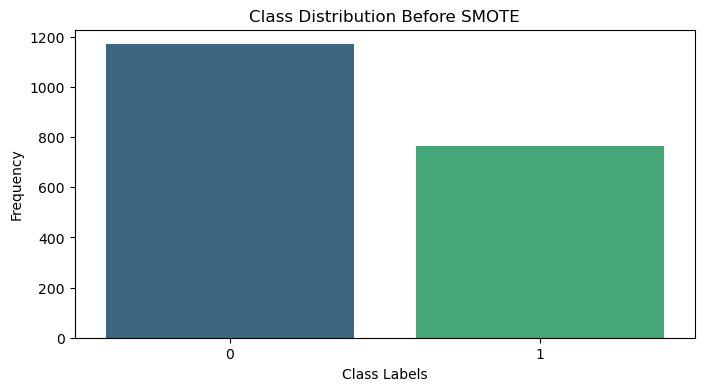

In [14]:
# Visualization 3: Class Distribution Before and After SMOTE
# Before SMOTE
plt.figure(figsize=(8, 4))
sns.barplot(x=list(Counter(y_cleaned).keys()), y=list(Counter(y_cleaned).values()), palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


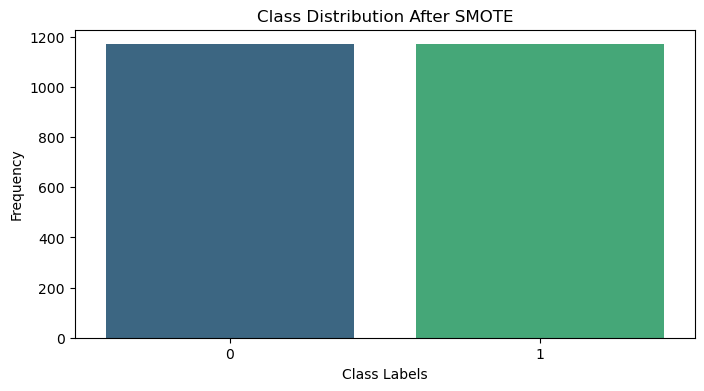

In [15]:
# After SMOTE
plt.figure(figsize=(8, 4))
sns.barplot(x=list(Counter(y_resampled).keys()), y=list(Counter(y_resampled).values()), palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

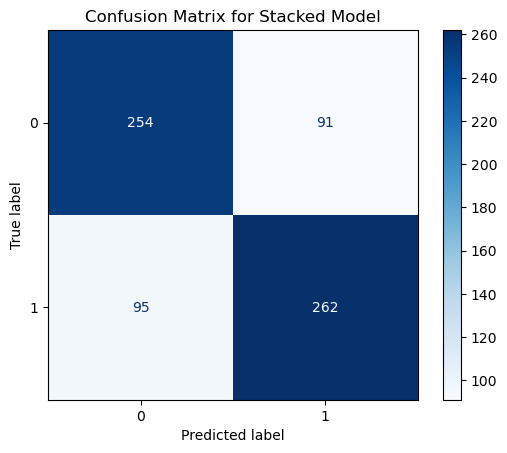

In [16]:
# Visualization 4: Confusion Matrix for the stacked model
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(stacked_model, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Stacked Model')
plt.show()

0.8048958713920351


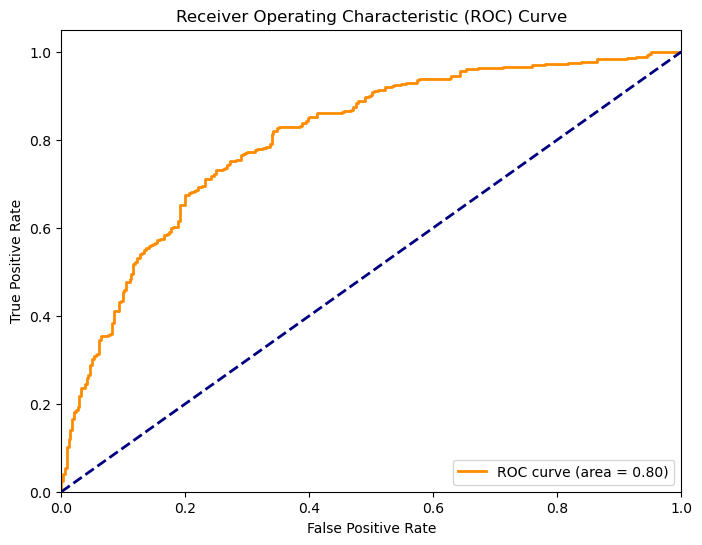

In [18]:
# Visualization 5: ROC Curve for model evaluation
# Get probabilities for the ROC curve (since we're using Logistic Regression as the meta-learner)
y_pred_proba = stacked_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Load your data into X and y
# Example: X = pd.DataFrame(data), y = pd.Series(target)

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # or 'median'
X_imputed = imputer.fit_transform(X)

# Now you can proceed with splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train SVM Model
svm_model = svm.SVC(probability=True)
svm_model.fit(X_train, y_train)

# Make predictions for SVM
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Train XGBoost Model
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix and ROC Curve plotting code remains unchanged

# Call the plotting functions
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Accuracy of SVM Model: 62.80%


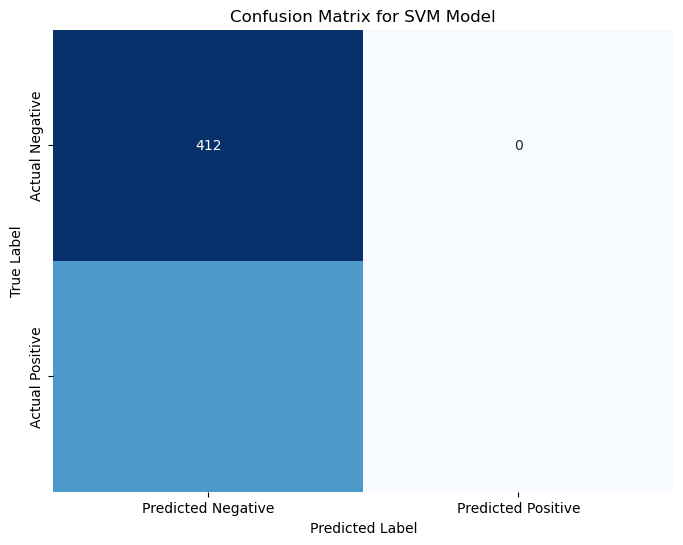

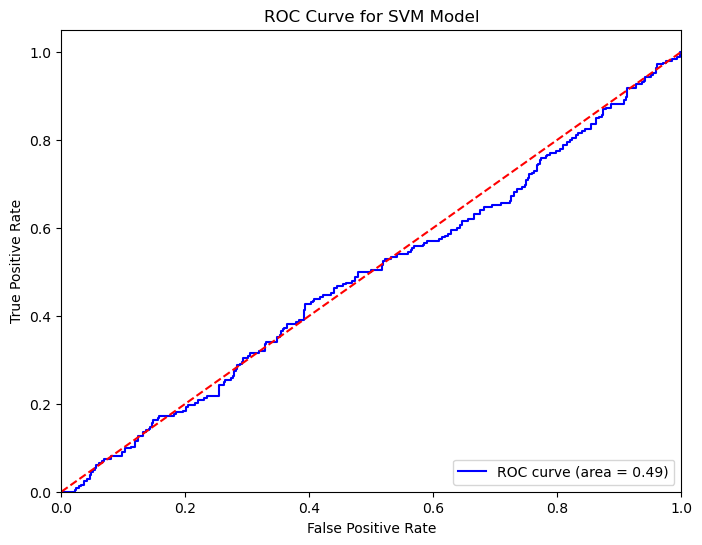

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# SVM Model
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy of SVM Model: {accuracy_svm * 100:.2f}%')
plot_confusion_matrix(y_test, y_pred_svm, 'SVM Model')
plot_roc_curve(y_test, y_pred_proba_svm, 'SVM Model')




Accuracy of XGBoost Model: 65.55%


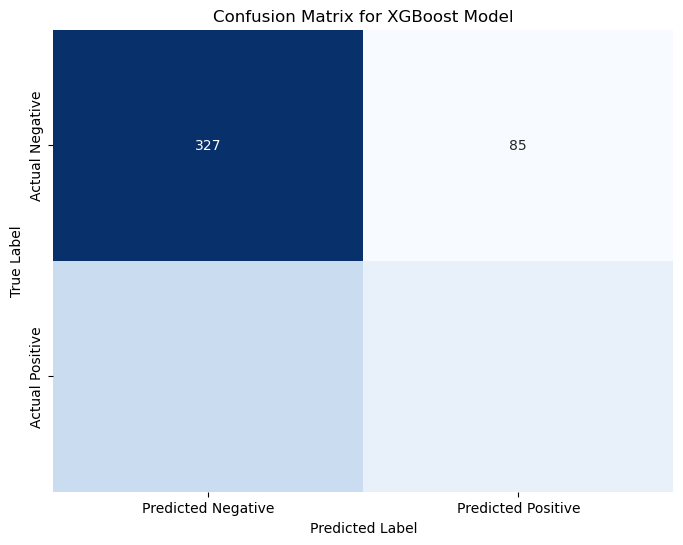

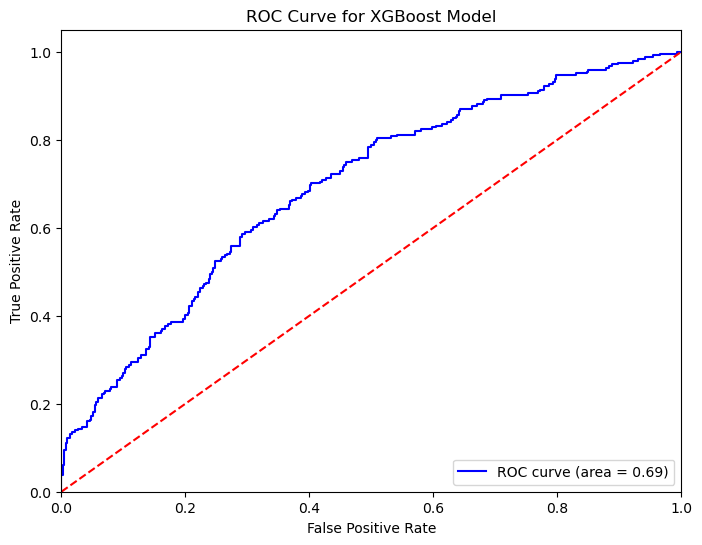

In [38]:
# XGBoost Model
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Accuracy of XGBoost Model: {accuracy_xgb * 100:.2f}%')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost Model')
plot_roc_curve(y_test, y_pred_proba_xgb, 'XGBoost Model')